In [181]:
import json
import os
import io

import textwrap

from collections import OrderedDict

import pandas as pd
import numpy as np 

import seaborn as sns
import calmap

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns

matplotlib.rcParams.update({'font.size': 15})

from tqdm import tqdm

In [2]:
FIG_SAVE_DIR = "../../car_accidents_paper/Paper/img/"

### Подготовка данных

In [3]:
dir_name = '2015/'
dir_names = [str(x) + '/' for x in range(2015, 2021)]
dir_names

['2015/', '2016/', '2017/', '2018/', '2019/', '2020/']

In [4]:
for json_file_path in os.listdir(dir_name):
    with open(dir_name + json_file_path, encoding='UTF-8') as json_file:
        json_dict = json.load(json_file)

In [5]:
data = json.loads(json_dict['data'])

In [6]:
data.keys()

dict_keys(['year', 'region_code', 'region_name', 'month_first', 'month_last', 'cards'])

In [7]:
# Пример карты ДТП
card = data['cards'][2]

In [8]:
card

{'KartId': 188412714,
 'rowNum': 3,
 'date': '22.12.2015',
 'Time': '09:10',
 'District': 'Южное Тушино',
 'DTP_V': 'Наезд на пешехода',
 'POG': 1,
 'RAN': 0,
 'K_TS': 1,
 'K_UCH': 2,
 'infoDtp': {'ndu': ['Отсутствие дорожных знаков в необходимых местах'],
  'sdor': ['Перегон (нет объектов на месте ДТП)'],
  'ts_info': [{'n_ts': '1',
    'ts_s': 'Нет',
    't_ts': 'Минивэны и универсалы повышенной вместимости',
    'marka_ts': 'NISSAN',
    'm_ts': 'Qashgai',
    'color': 'Серый',
    'r_rul': 'Передний',
    'g_v': '2011',
    'm_pov': 'Передний правый угол',
    't_n': 'Технические неисправности отсутствуют',
    'f_sob': 'Частная собственность',
    'o_pf': '',
    'ts_uch': [{'K_UCH': 'Водитель',
      'NPDD': ['Нет нарушений'],
      'S_T': 'Не пострадал',
      'POL': 'Женский',
      'V_ST': '17',
      'ALCO': '',
      'SOP_NPDD': ['Нет нарушений'],
      'SAFETY_BELT': 'Да',
      'S_SM': 'Нет (не скрывался)',
      'N_UCH': '2',
      'S_SEAT_GROUP': '',
      'INJURED_CARD_

In [9]:
cols_of_interest = [
    'date', 
    'Time',
    'District', 
    'DTP_V', 
    'POG', 
    'RAN',
    'K_TS',
    {'infoDtp' : [
        'ndu',
        'k_ul', 
        'dor_k', 
        'dor_z', 
        'factor', 
        's_pog', 
        's_pch', 
        'osv',
        'COORD_W', 'COORD_L',
        's_dtp'
    ]}
        
]

In [10]:
def get_row(dct: dict, result_row: OrderedDict=None, cols_of_interest: list=cols_of_interest) -> dict:
    """
    Extracts elements from dct by defined cols_of_interes
    """
    if result_row is None:
        # Для последующей записи в .tsv файл
        result_row = OrderedDict() 
    
    for col in cols_of_interest:
        if isinstance(col, str):
            result_row[col] = dct[col]
        elif isinstance(col, dict):
            key = iter(col.keys()).__next__()
            get_row(dct[key], result_row, col[key])

    return result_row


In [11]:
get_row(card)

OrderedDict([('date', '22.12.2015'),
             ('Time', '09:10'),
             ('District', 'Южное Тушино'),
             ('DTP_V', 'Наезд на пешехода'),
             ('POG', 1),
             ('RAN', 0),
             ('K_TS', 1),
             ('ndu', ['Отсутствие дорожных знаков в необходимых местах']),
             ('k_ul', 'Магистральные улицы общегородского значения'),
             ('dor_k', ''),
             ('dor_z', 'Не указано'),
             ('factor', ['Сведения отсутствуют']),
             ('s_pog', ['Дождь']),
             ('s_pch', 'Мокрое'),
             ('osv', 'Светлое время суток'),
             ('COORD_W', '55.837293'),
             ('COORD_L', '37.414841'),
             ('s_dtp', '820')])

In [12]:
# Посмотрим пример карты ДТП
card

{'KartId': 188412714,
 'rowNum': 3,
 'date': '22.12.2015',
 'Time': '09:10',
 'District': 'Южное Тушино',
 'DTP_V': 'Наезд на пешехода',
 'POG': 1,
 'RAN': 0,
 'K_TS': 1,
 'K_UCH': 2,
 'infoDtp': {'ndu': ['Отсутствие дорожных знаков в необходимых местах'],
  'sdor': ['Перегон (нет объектов на месте ДТП)'],
  'ts_info': [{'n_ts': '1',
    'ts_s': 'Нет',
    't_ts': 'Минивэны и универсалы повышенной вместимости',
    'marka_ts': 'NISSAN',
    'm_ts': 'Qashgai',
    'color': 'Серый',
    'r_rul': 'Передний',
    'g_v': '2011',
    'm_pov': 'Передний правый угол',
    't_n': 'Технические неисправности отсутствуют',
    'f_sob': 'Частная собственность',
    'o_pf': '',
    'ts_uch': [{'K_UCH': 'Водитель',
      'NPDD': ['Нет нарушений'],
      'S_T': 'Не пострадал',
      'POL': 'Женский',
      'V_ST': '17',
      'ALCO': '',
      'SOP_NPDD': ['Нет нарушений'],
      'SAFETY_BELT': 'Да',
      'S_SM': 'Нет (не скрывался)',
      'N_UCH': '2',
      'S_SEAT_GROUP': '',
      'INJURED_CARD_

In [13]:
def write_row(row: OrderedDict, file: io.TextIOWrapper, write_cols=False, sep='\t') -> None:
    """
    Writes row to specified file using defined separator
    """
    if write_cols:
        print(f'{sep}'.join((col_name for col_name in row)), file=file)
    
    print(f'{sep}'.join((str(value) for _, value in row.items())), file=file)

In [14]:
with open('test.tsv', 'w', encoding='UTF-8') as test_file:
    row = get_row(card)
    write_row(row, test_file, write_cols=True)

In [15]:
# Test
test_df = pd.read_csv('test.tsv', sep='\t')

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1 non-null      object 
 1   Time      1 non-null      object 
 2   District  1 non-null      object 
 3   DTP_V     1 non-null      object 
 4   POG       1 non-null      int64  
 5   RAN       1 non-null      int64  
 6   K_TS      1 non-null      int64  
 7   ndu       1 non-null      object 
 8   k_ul      1 non-null      object 
 9   dor_k     0 non-null      float64
 10  dor_z     1 non-null      object 
 11  factor    1 non-null      object 
 12  s_pog     1 non-null      object 
 13  s_pch     1 non-null      object 
 14  osv       1 non-null      object 
 15  COORD_W   1 non-null      float64
 16  COORD_L   1 non-null      float64
 17  s_dtp     1 non-null      int64  
dtypes: float64(3), int64(4), object(11)
memory usage: 272.0+ bytes


In [17]:
final_filename = 'all_years_accidents.tsv'
need_to_write_cols = True

with open(final_filename, 'w', encoding='UTF-8') as file_to_write:
    
    for dir_name in tqdm(dir_names):
        for json_file_path in os.listdir(dir_name):
            
            with open(dir_name + json_file_path, encoding='UTF-8') as json_file:
                json_dict = json.load(json_file)
                data = json.loads(json_dict['data'])
                
                for card in data['cards']:
                    row = get_row(card)
                    write_row(row, file_to_write, write_cols=need_to_write_cols)
                    need_to_write_cols = False


100%|██████████| 6/6 [00:11<00:00,  1.95s/it]


### Исследование данных

In [18]:
final_filename = 'all_years_accidents.tsv'

df = pd.read_csv(final_filename, sep='\t')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
#df = df.set_index('date', drop=False).sort_index()
df.tail()

C:\Users\79661\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,Time,District,DTP_V,POG,RAN,K_TS,ndu,k_ul,dor_k,dor_z,factor,s_pog,s_pch,osv,COORD_W,COORD_L,s_dtp
54782,2020-01-14,08:20,ГУ МВД 2 СП ДПС 2 бат.,Столкновение,0,1,3,['Не установлены'],NaN,4.0,Федеральная (дорога федерального значения),['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.7891,37.2814,200
54783,2020-01-10,07:30,ГУ МВД 2 СП ДПС 2 бат.,Наезд на пешехода,0,1,1,['Не установлены'],NaN,4.0,Федеральная (дорога федерального значения),['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.737,37.2479,740
54784,2020-01-07,22:45,ГУ МВД 2 СП ДПС 2 бат.,Наезд на пешехода,0,2,1,['Не установлены'],NaN,1.0,Федеральная (дорога федерального значения),['Сведения отсутствуют'],['Пасмурно'],Сухое,"В темное время суток, освещение включено",55.7572,37.2366,740
54785,2020-01-06,06:10,ГУ МВД 2 СП ДПС 2 бат.,Столкновение,0,1,2,['Не установлены'],NaN,4.0,Федеральная (дорога федерального значения),['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.7644,37.3657,140
54786,2020-01-01,03:15,ГУ МВД 2 СП ДПС 2 бат.,Наезд на пешехода,0,1,1,['Не установлены'],NaN,1.0,Федеральная (дорога федерального значения),['Сведения отсутствуют'],['Снегопад'],Мокрое,"В темное время суток, освещение включено",55.6797,37.2762,710


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54787 entries, 0 to 54786
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      54787 non-null  datetime64[ns]
 1   Time      54787 non-null  object        
 2   District  54787 non-null  object        
 3   DTP_V     54787 non-null  object        
 4   POG       54787 non-null  int64         
 5   RAN       54787 non-null  int64         
 6   K_TS      54787 non-null  int64         
 7   ndu       54787 non-null  object        
 8   k_ul      50006 non-null  object        
 9   dor_k     9512 non-null   float64       
 10  dor_z     54787 non-null  object        
 11  factor    54787 non-null  object        
 12  s_pog     54787 non-null  object        
 13  s_pch     54787 non-null  object        
 14  osv       54787 non-null  object        
 15  COORD_W   54787 non-null  object        
 16  COORD_L   54787 non-null  object        
 17  s_dtp     54

In [20]:
df.describe()

,POG,RAN,K_TS,dor_k,s_dtp
count,54787.000000,54787.000000,54787.000000,9512.000000,54787.000000
mean,0.054977,1.142224,1.701243,2.076009,527.486630
std,0.251103,0.634521,0.804991,1.577229,340.617757
min,0.000000,0.000000,1.000000,1.000000,10.000000
25%,0.000000,1.000000,1.000000,1.000000,110.000000
50%,0.000000,1.000000,2.000000,1.000000,700.000000
75%,0.000000,1.000000,2.000000,4.000000,820.000000
max,8.000000,19.000000,13.000000,8.000000,990.000000


In [21]:
np.unique(df.osv)

array(['В темное время суток, освещение включено',
       'В темное время суток, освещение не включено',
       'В темное время суток, освещение отсутствует', 'Не установлено',
       'Светлое время суток', 'Сумерки'], dtype=object)

In [22]:
json.loads('["1",2,3]')

['1', 2, 3]

In [23]:
# Unique ndu column elements
set(xi for x in [json.loads(x.replace("'",'\"')) for x in df.ndu.values.tolist()] for xi in x)

{'Дефекты покрытия',
 'Иные недостатки',
 'Нарушения в размещении наружной рекламы',
 'Не установлены',
 'Недостатки зимнего содержания',
 'Недостаточное освещение',
 'Неисправное освещение',
 'Неисправность светофора',
 'Неправильное применение, плохая видимость дорожных знаков',
 'Неровное покрытие',
 'Несоответствие дорожных ограждений предъявляемым требованиям',
 'Несоответствие железнодорожного переезда предъявляемым требованиям',
 'Несоответствие люков смотровых колодцев и ливневой канализации предъявляемым требованиям',
 'Неудовлетворительное состояние обочин',
 'Неудовлетворительное состояние разделительной полосы',
 'Низкие сцепные качества покрытия',
 'Ограничение видимости',
 'Отсутствие временных ТСОД в местах проведения работ',
 'Отсутствие дорожных знаков в необходимых местах',
 'Отсутствие дорожных ограждений в необходимых местах',
 'Отсутствие направляющих устройств и световозвращающих элементов на них',
 'Отсутствие освещения',
 'Отсутствие пешеходных ограждений в необ

In [38]:
def figsave(filename):
    plt.savefig(os.path.join(FIG_SAVE_DIR, filename))

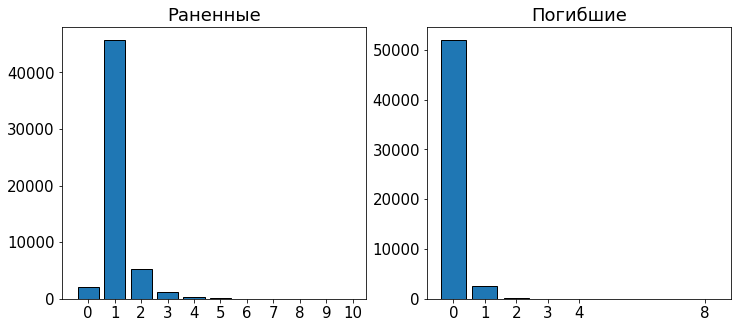

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

rng, cnt = np.unique(df.RAN, return_counts=True)
axs[0].bar(rng, cnt, tick_label=rng, edgecolor='black');
axs[0].set_title("Раненные")
axs[0].set_xlim(-1, 10.5)

rng, cnt = np.unique(df.POG, return_counts=True)
axs[1].bar(rng, cnt, tick_label=rng, edgecolor='black');
axs[1].set_title("Погибшие")

figsave('ran_pog_hist.png')

In [24]:
rng, cnt = np.unique(df.RAN, return_counts=True)

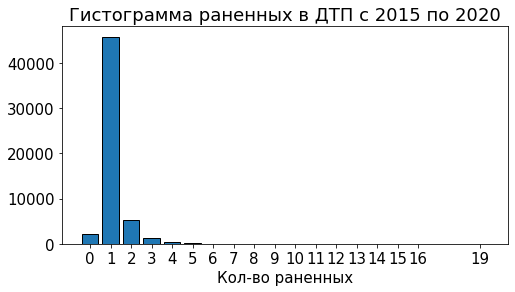

In [25]:
plt.figure(figsize=(8,4))
plt.title("Гистограмма раненных в ДТП с 2015 по 2020")
plt.xlabel("Кол-во раненных")
plt.bar(rng, cnt, tick_label=rng, edgecolor='black');

In [26]:
rng, cnt = np.unique(df.POG, return_counts=True)

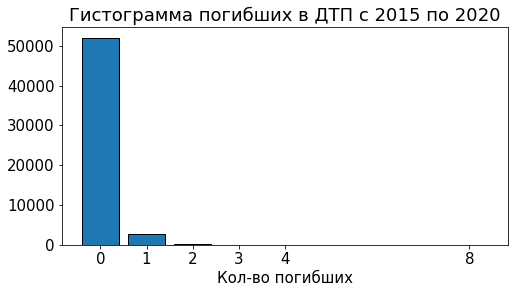

In [27]:
plt.figure(figsize=(8,4))
plt.title("Гистограмма погибших в ДТП с 2015 по 2020")
plt.xlabel("Кол-во погибших")
plt.bar(rng, cnt, tick_label=rng, edgecolor='black');

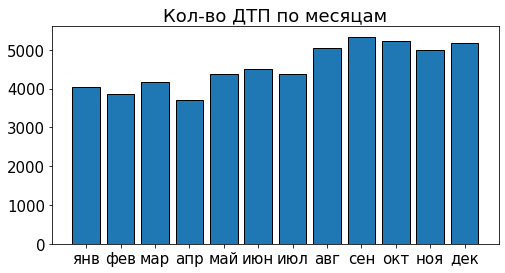

In [28]:
plt.figure(figsize=(8,4))
plt.title("Кол-во ДТП по месяцам")
plt.bar(df.groupby(df.date.dt.month).count()['RAN'].index, 
        df.groupby(df.date.dt.month).count()['RAN'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');

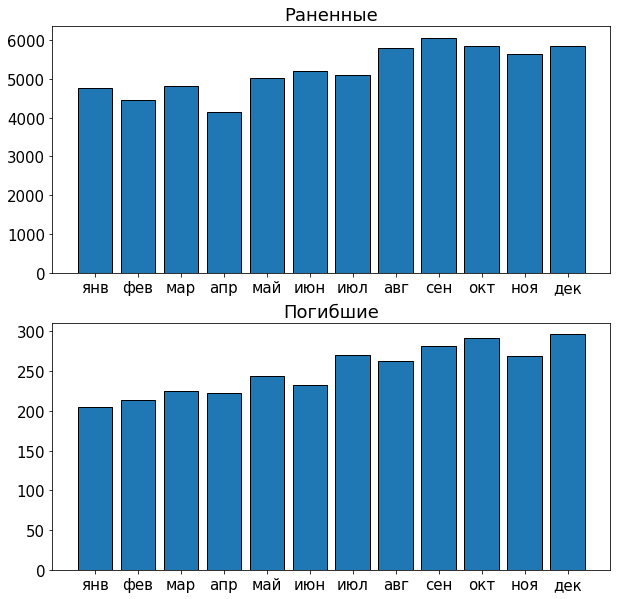

In [82]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].bar(df.groupby(df.date.dt.month).sum()['RAN'].index, 
        df.groupby(df.date.dt.month).sum()['RAN'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');
axs[0].set_title("Раненные")


axs[1].bar(df.groupby(df.date.dt.month).sum()['POG'].index, 
        df.groupby(df.date.dt.month).sum()['POG'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');
axs[1].set_title("Погибшие")

figsave('ran_pog_month.png')

In [177]:
df.date.dt.year != 2020

0         True
1         True
2         True
3         True
4         True
         ...  
54782    False
54783    False
54784    False
54785    False
54786    False
Name: date, Length: 54787, dtype: bool

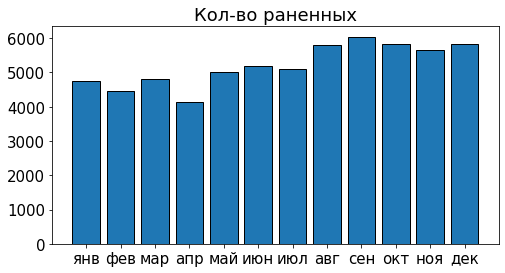

In [179]:
plt.figure(figsize=(8,4))
plt.title("Кол-во раненных")
plt.bar(df.groupby(df.date.dt.month).sum()['RAN'].index, 
        df.groupby(df.date.dt.month).sum()['RAN'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');

In [191]:
df.date.dt.month == 2020

0        False
1        False
2        False
3        False
4        False
         ...  
54782    False
54783    False
54784    False
54785    False
54786    False
Name: date, Length: 54787, dtype: bool

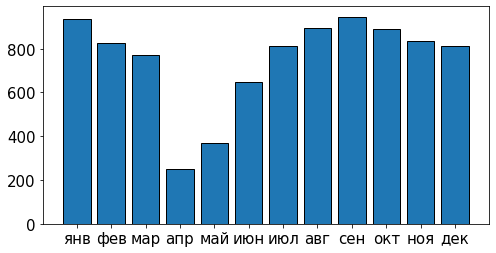

In [199]:
plt.figure(figsize=(8,4))
#plt.title("2020-й год")
plt.bar(df[df.date.dt.year == 2020].groupby(df.date.dt.month).sum()['RAN'].index, 
        df[df.date.dt.year == 2020].groupby(df.date.dt.month).sum()['RAN'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');

figsave('2020_ran.png')

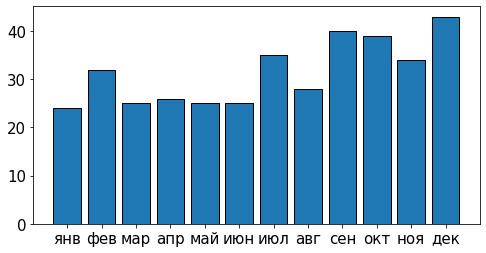

In [201]:
plt.figure(figsize=(8,4))
#plt.title("2020-й год")
plt.bar(df[df.date.dt.year == 2020].groupby(df.date.dt.month).sum()['POG'].index, 
        df[df.date.dt.year == 2020].groupby(df.date.dt.month).sum()['POG'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');

figsave('2020_pog.png')

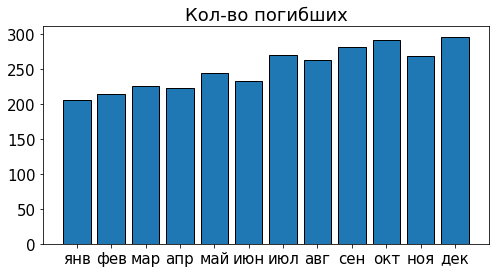

In [30]:
plt.figure(figsize=(8,4))
plt.title("Кол-во погибших")
plt.bar(df.groupby(df.date.dt.month).sum()['POG'].index, 
        df.groupby(df.date.dt.month).sum()['POG'].values,
       tick_label=['янв', 'фев' ,'мар' ,'апр','май' ,'июн','июл' ,'авг','сен' ,'окт','ноя' ,'дек'],
       edgecolor='black');

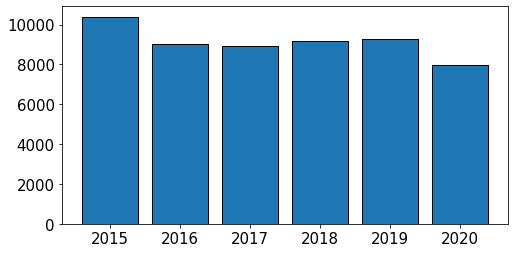

In [39]:
plt.figure(figsize=(8,4))
#plt.title("Кол-во ДТП по годам")
plt.bar(df.groupby(df.date.dt.year).count()['RAN'].index, 
        df.groupby(df.date.dt.year).count()['RAN'].values,
       tick_label=df.groupby(df.date.dt.year).count()['RAN'].index,
       edgecolor='black');


figsave("dtp_count_years.png")

In [1]:
# fig, axs = plt.subplots(1, 2, figsize=(12,5))
# axs[0].bar(df.groupby(df.date.dt.year).sum()['RAN'].index, 
#         df.groupby(df.date.dt.year).sum()['RAN'].values,
#        tick_label=df.groupby(df.date.dt.year).sum()['RAN'].index,
#        edgecolor='black');
# axs[0].set_title("Раненные")

# axs[1].bar(df.groupby(df.date.dt.year).sum()['POG'].index, 
#         df.groupby(df.date.dt.year).sum()['POG'].values,
#        tick_label=df.groupby(df.date.dt.year).sum()['POG'].index,
#        edgecolor='black');
# axs[1].set_title("Погибшие");

# figsave('ran_pog_years.png')

In [2]:
# fig, axs = plt.subplots(1, 2, figsize=(12,5))
# axs[0].bar(df.groupby(df.date.dt.year).sum()['RAN'].index, 
#         df.groupby(df.date.dt.year).sum()['RAN'].values / df.groupby(df.date.dt.year).count()['RAN'].values,
#        tick_label=df.groupby(df.date.dt.year).sum()['RAN'].index,
#        edgecolor='black');
# axs[0].set_title("Раненные к количеству ДТП")

# axs[1].bar(df.groupby(df.date.dt.year).sum()['POG'].index, 
#         df.groupby(df.date.dt.year).sum()['POG'].values / df.groupby(df.date.dt.year).count()['RAN'].values,
#        tick_label=df.groupby(df.date.dt.year).sum()['POG'].index,
#        edgecolor='black');
# axs[1].set_title("Погибшие к количеству ДТП");

# figsave('ran_pog_ratios_years.png')

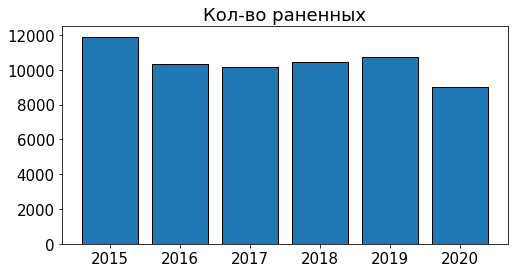

In [32]:
plt.figure(figsize=(8,4))
plt.title("Кол-во раненных")
plt.bar(df.groupby(df.date.dt.year).sum()['RAN'].index, 
        df.groupby(df.date.dt.year).sum()['RAN'].values,
       tick_label=df.groupby(df.date.dt.year).sum()['RAN'].index,
       edgecolor='black');

In [3]:
# plt.figure(figsize=(8,4))
# #plt.title("Кол-во погибших")
# plt.bar(df.groupby(df.date.dt.year).sum()['POG'].index, 
#         df.groupby(df.date.dt.year).sum()['POG'].values,
#        tick_label=df.groupby(df.date.dt.year).sum()['POG'].index,
#        edgecolor='black');
# #plt.xlabel("Год")

# plt.savefig(FIG_SAVE_DIR + "pog_dyn_years.png")

In [83]:
weather_df = pd.read_csv('weather_data.csv', sep=';', encoding='UTF-8', comment='#',
                        error_bad_lines=False)

weather_df['date'] = weather_df["Local time in Sheremetyevo (airport)"].apply(lambda x: x.split()[0])
weather_df['time'] = weather_df["Local time in Sheremetyevo (airport)"].apply(lambda x: x.split()[1])

weather_df['date'] = pd.to_datetime(weather_df['date'], format='%d.%m.%Y')

b'Skipping line 86591: expected 14 fields, saw 16\nSkipping line 86597: expected 14 fields, saw 16\n'


In [84]:
weather_df.head()

,Local time in Sheremetyevo (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13,date,time
0,06.02.2021 19:00,-17.0,737.6,756.2,71.0,Wind blowing from the west-northwest,5,NaN,Light snow,NaN,Scattered clouds (40-50%) 1080 m,10.0 and more,-21.0,NaN,2021-02-06,19:00
1,06.02.2021 18:00,-17.0,737.6,756.2,71.0,Wind blowing from the north-west,6,NaN,Light snow,NaN,Scattered clouds (40-50%) 840 m,10.0 and more,-21.0,NaN,2021-02-06,18:00
2,06.02.2021 17:30,-17.0,736.8,755.4,78.0,Wind blowing from the north-west,6,NaN,"Light snow, mist",Snow,Scattered clouds (40-50%) 570 m,6.0,-20.0,NaN,2021-02-06,17:30
3,06.02.2021 17:00,-16.0,736.9,755.4,72.0,Wind blowing from the west-northwest,6,NaN,Light snow,NaN,Scattered clouds (40-50%) 600 m,9.0,-20.0,NaN,2021-02-06,17:00
4,06.02.2021 16:30,-16.0,736.9,755.4,66.0,Wind blowing from the west-northwest,8,13.0,NaN,NaN,Scattered clouds (40-50%) 780 m,10.0 and more,-21.0,NaN,2021-02-06,16:30


In [85]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98805 entries, 0 to 98804
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Local time in Sheremetyevo (airport)  98805 non-null  object        
 1   T                                     98792 non-null  float64       
 2   P0                                    98792 non-null  float64       
 3   P                                     98805 non-null  float64       
 4   U                                     98792 non-null  float64       
 5   DD                                    98805 non-null  object        
 6   Ff                                    98805 non-null  int64         
 7   ff10                                  4411 non-null   float64       
 8   WW                                    25101 non-null  object        
 9   W'W'                                  958 non-null    object        
 10

In [86]:
def round_time(time: str) -> str:
    hh, mm = map(int, time.split(":")) 
    
    if mm <= 15:
        mm = 0
    elif mm > 15 and mm <= 45:
        mm = 30
    else:
        mm = 0
        hh += 1
    
    hh, mm = (hh < 10) * '0' + str(hh), (mm < 10) * '0' + str(mm)
    if hh == '24':
        hh = '00'
    return f'{hh}:{mm}'

In [87]:
df['time'] = df['Time'].apply(round_time)

In [88]:
df.head()

,date,Time,District,DTP_V,POG,RAN,K_TS,ndu,k_ul,dor_k,dor_z,factor,s_pog,s_pch,osv,COORD_W,COORD_L,s_dtp,time
0,2015-12-28,19:35,Южное Тушино,Наезд на стоящее ТС,0,1,2,['Не установлены'],Вне НП,1.0,Региональная или межмуниципальная (дорога реги...,['Сведения отсутствуют'],['Пасмурно'],Сухое,"В темное время суток, освещение включено",55.85,37.393,910,19:30
1,2015-12-24,08:05,Южное Тушино,Наезд на пешехода,1,0,1,['Не установлены'],Магистральные улицы районного значения,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,Светлое время суток,55.8536,37.4283,780,08:00
2,2015-12-22,09:10,Южное Тушино,Наезд на пешехода,1,0,1,['Отсутствие дорожных знаков в необходимых мес...,Магистральные улицы общегородского значения,NaN,Не указано,['Сведения отсутствуют'],['Дождь'],Мокрое,Светлое время суток,55.837293,37.414841,820,09:00
3,2015-12-22,08:20,Южное Тушино,Падение пассажира,0,1,1,['Не установлены'],Магистральные улицы общегородского значения,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,Светлое время суток,55.850621,37.410243,960,08:30
4,2015-12-20,20:00,Южное Тушино,Столкновение,0,1,2,['Не установлены'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Дождь'],Мокрое,"В темное время суток, освещение включено",55.849596,37.440181,300,20:00


In [89]:
weather_df.head()

,Local time in Sheremetyevo (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13,date,time
0,06.02.2021 19:00,-17.0,737.6,756.2,71.0,Wind blowing from the west-northwest,5,NaN,Light snow,NaN,Scattered clouds (40-50%) 1080 m,10.0 and more,-21.0,NaN,2021-02-06,19:00
1,06.02.2021 18:00,-17.0,737.6,756.2,71.0,Wind blowing from the north-west,6,NaN,Light snow,NaN,Scattered clouds (40-50%) 840 m,10.0 and more,-21.0,NaN,2021-02-06,18:00
2,06.02.2021 17:30,-17.0,736.8,755.4,78.0,Wind blowing from the north-west,6,NaN,"Light snow, mist",Snow,Scattered clouds (40-50%) 570 m,6.0,-20.0,NaN,2021-02-06,17:30
3,06.02.2021 17:00,-16.0,736.9,755.4,72.0,Wind blowing from the west-northwest,6,NaN,Light snow,NaN,Scattered clouds (40-50%) 600 m,9.0,-20.0,NaN,2021-02-06,17:00
4,06.02.2021 16:30,-16.0,736.9,755.4,66.0,Wind blowing from the west-northwest,8,13.0,NaN,NaN,Scattered clouds (40-50%) 780 m,10.0 and more,-21.0,NaN,2021-02-06,16:30


In [90]:
all_df = pd.merge(df, weather_df[['date', 'time', 'T']], how='left', on=['date', 'time'])

In [91]:
all_df.set_index('date',drop=False, inplace=True)

In [92]:
all_df.sort_index(inplace=True)

In [93]:
all_df.head()

,date,Time,District,DTP_V,POG,RAN,K_TS,ndu,k_ul,dor_k,dor_z,factor,s_pog,s_pch,osv,COORD_W,COORD_L,s_dtp,time,T
date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,04:30,Марьина роща,Столкновение,0,1,2,['Не установлены'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.795833,37.612778,500,04:30,-5.0
2015-01-01,2015-01-01,05:05,Крюково,Столкновение,0,1,2,"['Низкие сцепные качества покрытия', 'Недостат...",Улицы и дороги местного значения в жилой застр...,2.0,Не указано,"['Участок, контролируемый камерой автоматическ...",['Пасмурно'],Заснеженное,"В темное время суток, освещение включено",55.979444,37.187222,300,05:00,-4.0
2015-01-01,2015-01-01,18:00,Крюково,Наезд на пешехода,0,1,1,['Недостатки зимнего содержания'],Улицы и дороги местного значения в жилой застр...,2.0,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.977222,37.158056,750,18:00,0.0
2015-01-01,2015-01-01,01:39,Солнцево,Столкновение,0,1,2,['Недостатки зимнего содержания'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Заснеженное,"В темное время суток, освещение включено",55.649444,37.405833,210,01:30,-6.0
2015-01-01,2015-01-01,03:35,Рязанский,Столкновение,0,1,2,['Неудовлетворительное состояние разделительно...,Магистральные улицы районного значения,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Сухое,"В темное время суток, освещение включено",55.730833,37.338889,60,03:30,-5.0


In [94]:
all_df['T'].fillna(method='ffill', inplace=True)

In [95]:
all_df.to_csv('all_years_accidents.tsv', sep='\t')

In [96]:
sum_pog_ran = all_df.groupby(all_df.date.dt.month).sum()[['POG', 'RAN']]

In [97]:
mean_t_by_m = all_df.groupby(all_df.date.dt.month).mean()['T']

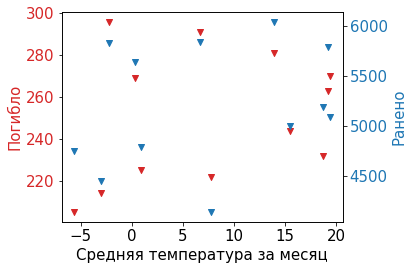

In [110]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Средняя температура за месяц')
ax1.set_ylabel("Погибло", color=color)
ax1.scatter(mean_t_by_m.values, sum_pog_ran['POG'], color=color, marker='v')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Ранено', color=color)
plt.scatter(mean_t_by_m.values, sum_pog_ran['RAN'], color=color, marker='v')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#figsave('ran_pog_temperature.png')
plt.show();

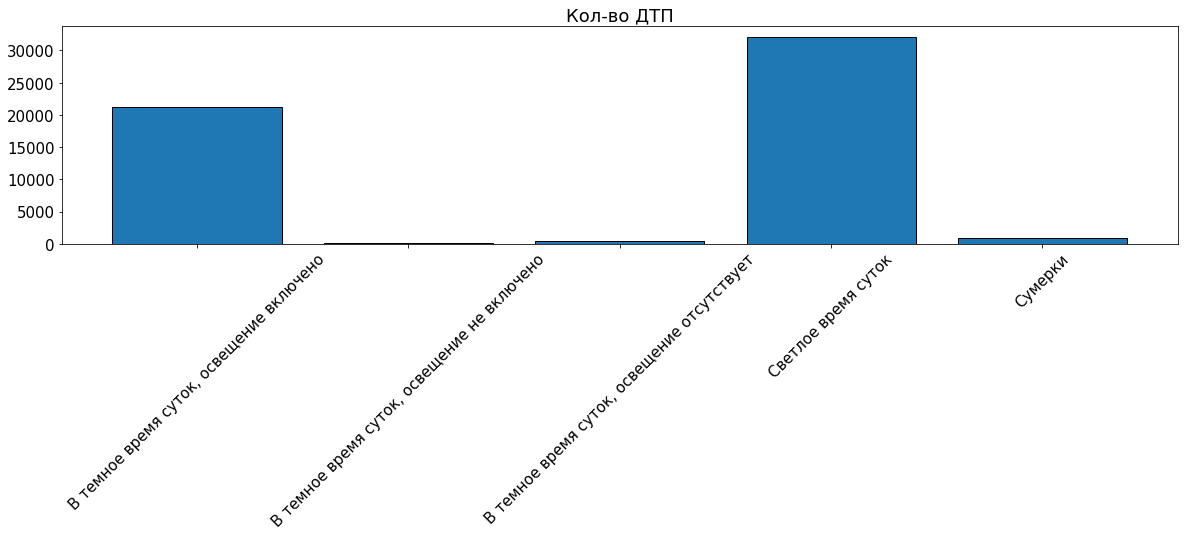

In [58]:
ind, val = df.groupby(df.osv).sum()['RAN'].index, df.groupby(df.osv).count()['RAN'].values

ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(20,4))
plt.title("Кол-во ДТП")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind, rotation=45);

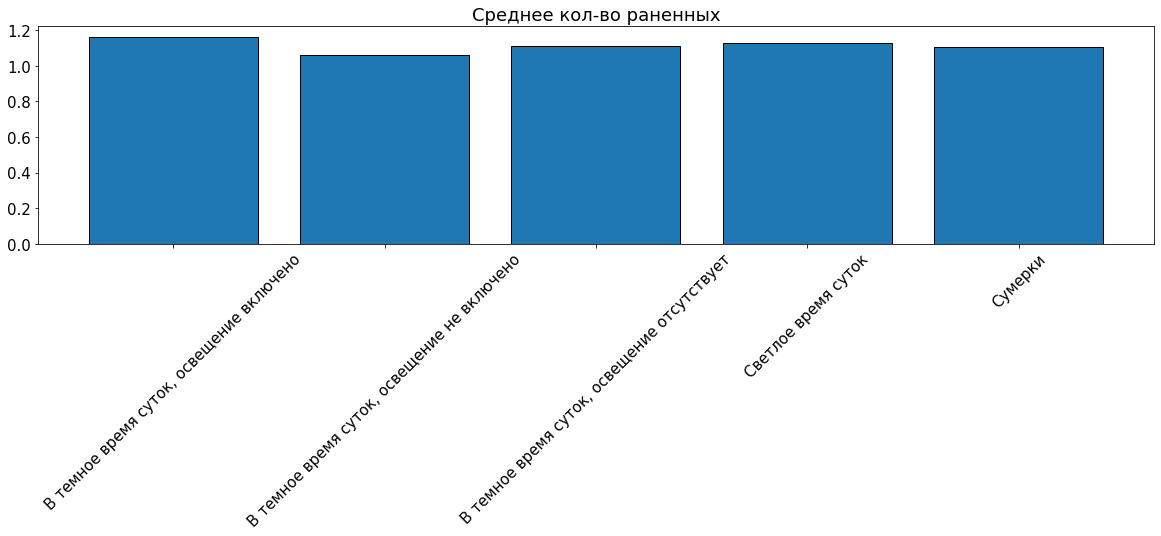

In [59]:
ind, val = df.groupby(df.osv).sum()['RAN'].index, df.groupby(df.osv).mean()['RAN'].values

ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(20,4))
plt.title("Среднее кол-во раненных")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind, rotation=45);

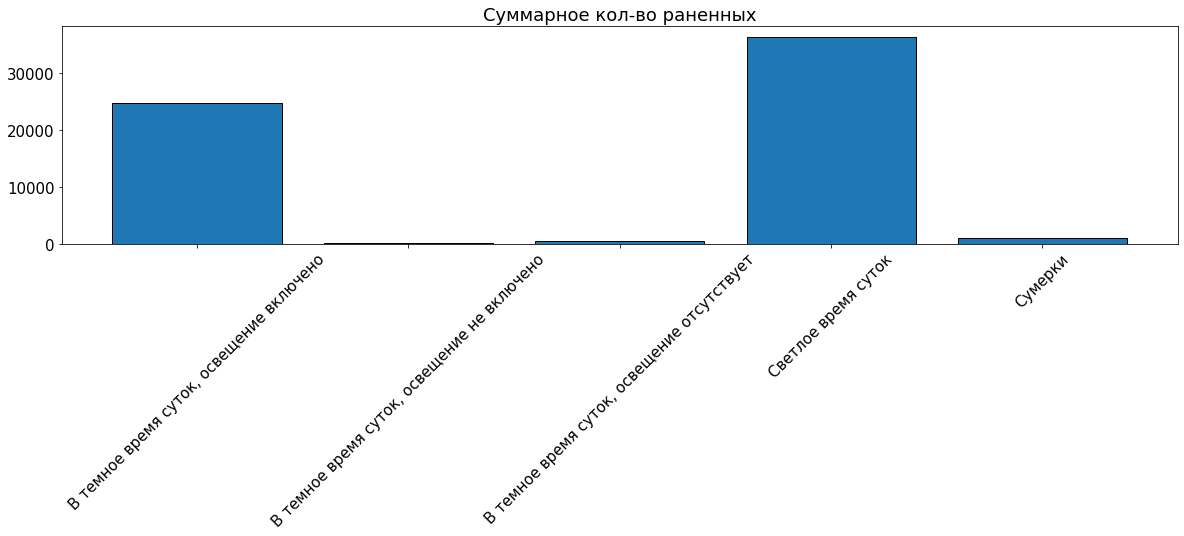

In [60]:
ind, val = df.groupby(df.osv).sum()['RAN'].index, df.groupby(df.osv).sum()['RAN'].values

ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(20,4))
plt.title("Суммарное кол-во раненных")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind, rotation=45);

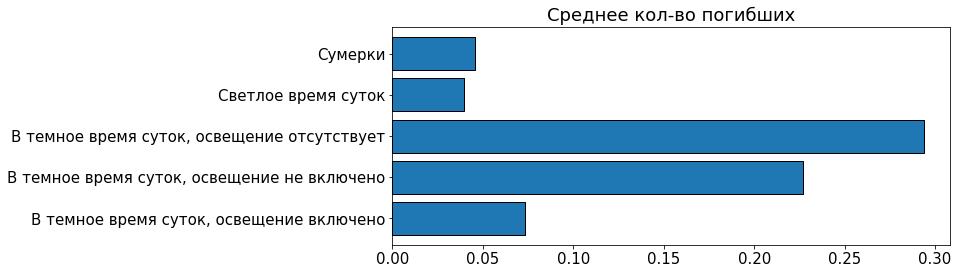

In [210]:
ind, val = df.groupby(df.osv).mean()['POG'].index, df.groupby(df.osv).mean()['POG'].values

ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(10,4))
plt.title("Среднее кол-во погибших")
plt.barh(ind, 
        val,
       edgecolor='black');
#plt.yticks(None);

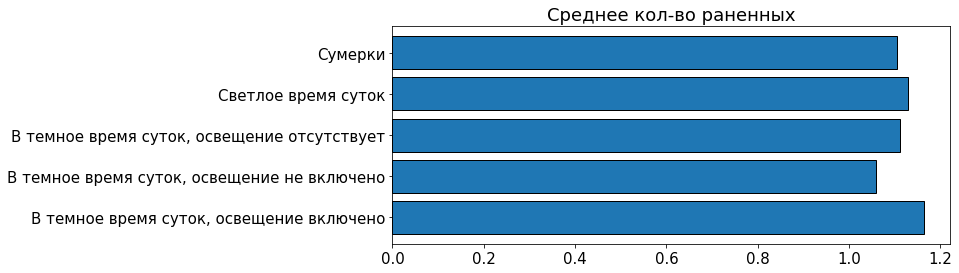

In [207]:
ind, val = df.groupby(df.osv).mean()['RAN'].index, df.groupby(df.osv).mean()['RAN'].values

ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(10,4))
plt.title("Среднее кол-во раненных")
plt.barh(ind, 
        val,
       edgecolor='black');
#plt.yticks(ind);

In [4]:
# fig, axs = plt.subplots(1, 2, figsize=(5,5))

# ind, val = df.groupby(df.osv).mean()['POG'].index, df.groupby(df.osv).mean()['POG'].values

# ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

# axs[0].barh(ind, 
#         val,
#        edgecolor='black');
# axs[0].set_title("Погибшие")

# ind, val = df.groupby(df.osv).mean()['RAN'].index, df.groupby(df.osv).mean()['RAN'].values

# ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

# axs[1].barh(ind, 
#         val,
#        edgecolor='black');
# axs[1].set_title("Раненные")
# axs[1].yaxis.set_visible(False)

# #figsave('pog_ran_osv1.png')

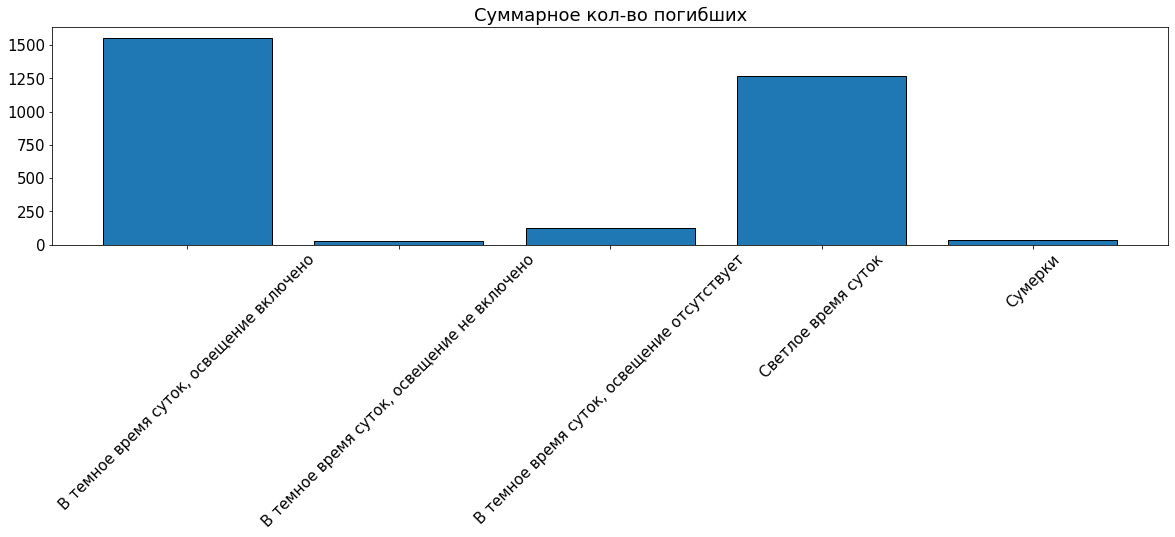

In [62]:
ind, val = df.groupby(df.osv).mean()['POG'].index, df.groupby(df.osv).sum()['POG'].values

ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(20,4))
plt.title("Суммарное кол-во погибших")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind, rotation=45);

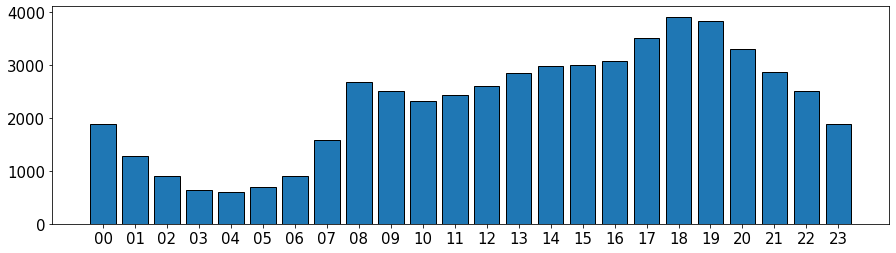

In [147]:
ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).count()['POG'].index, \
all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).count()['POG'].values

plt.figure(figsize=(15,4))
#plt.title("Количество ДТП по часам")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind);

#figsave("dtp_count_hours.png")

In [5]:
# fig, axs = plt.subplots(2, 1, figsize=(13,9))

# ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['RAN'].index, \
# all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['RAN'].values


# axs[0].bar(ind, 
#         val,
#        edgecolor='black');
# axs[0].set_title("Среднее количество раненных по часам")
# axs[0].set_xticks(ind);

# ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['POG'].index, \
# all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['POG'].values

# axs[1].bar(ind, 
#         val,
#        edgecolor='black');
# axs[1].set_title("Среднее количество погибших по часам")
# axs[1].set_xticks(ind);

# figsave('ran_pog_mean_hour.png')

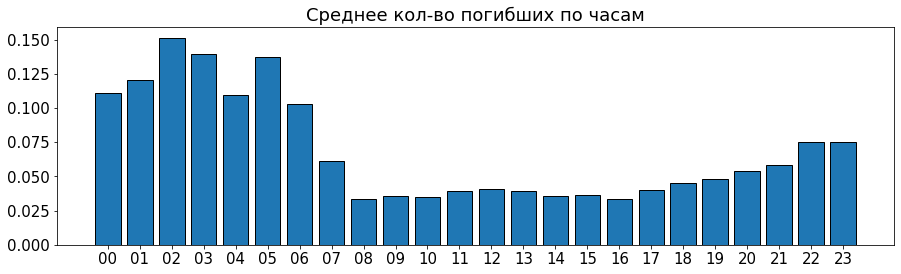

In [64]:
ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['POG'].index, \
all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['POG'].values

plt.figure(figsize=(15,4))
plt.title("Среднее кол-во погибших по часам")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind);

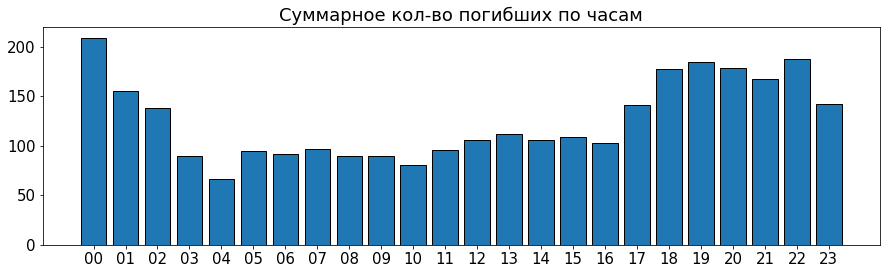

In [65]:
ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).sum()['POG'].index, \
all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).sum()['POG'].values

plt.figure(figsize=(15,4))
plt.title("Суммарное кол-во погибших по часам")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind);

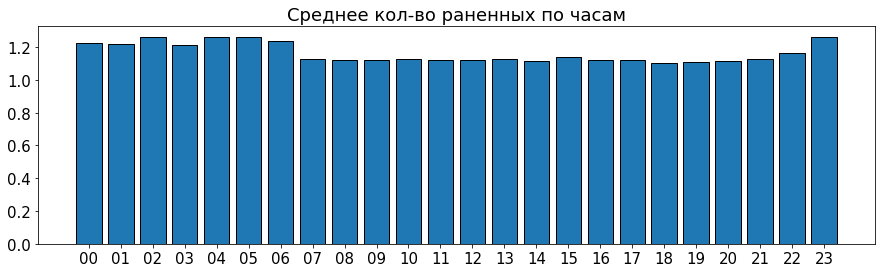

In [66]:
ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['RAN'].index, \
all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).mean()['RAN'].values

plt.figure(figsize=(15,4))
plt.title("Среднее кол-во раненных по часам")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind);

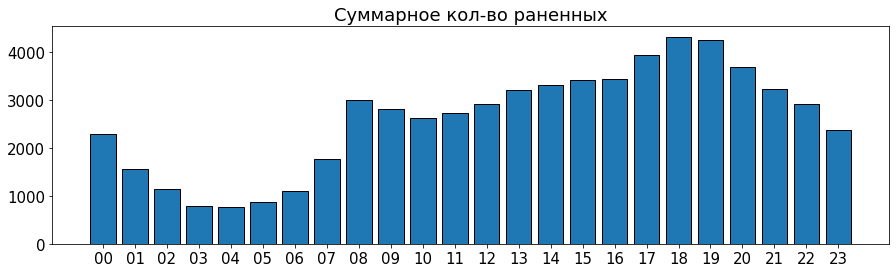

In [67]:
ind, val = all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).sum()['RAN'].index, \
all_df.groupby(all_df['time'].apply(lambda time: time.split(":")[0])).sum()['RAN'].values

plt.figure(figsize=(15,4))
plt.title("Суммарное кол-во раненных")
plt.bar(ind, 
        val,
       edgecolor='black');
plt.xticks(ind);

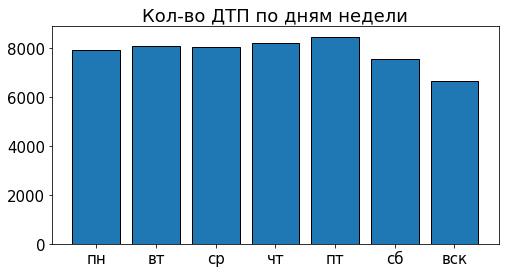

In [68]:
plt.figure(figsize=(8,4))
plt.title("Кол-во ДТП по дням недели")
plt.bar(all_df.groupby(all_df.date.dt.weekday).count()['RAN'].index, 
        all_df.groupby(all_df.date.dt.weekday).count()['RAN'].values,
       tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
       edgecolor='black');

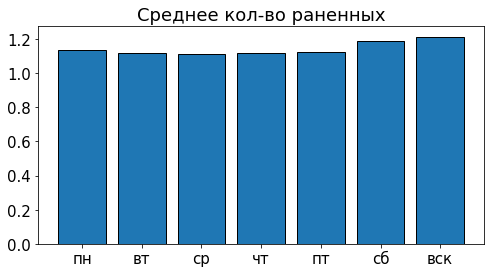

In [69]:
plt.figure(figsize=(8,4))
plt.title("Среднее кол-во раненных")
plt.bar(all_df.groupby(all_df.date.dt.weekday).mean()['RAN'].index, 
        all_df.groupby(all_df.date.dt.weekday).mean()['RAN'].values,
       tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
       edgecolor='black');

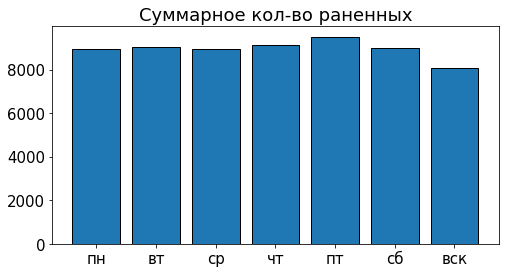

In [70]:
plt.figure(figsize=(8,4))
plt.title("Суммарное кол-во раненных")
plt.bar(all_df.groupby(all_df.date.dt.weekday).sum()['RAN'].index, 
        all_df.groupby(all_df.date.dt.weekday).sum()['RAN'].values,
       tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
       edgecolor='black');

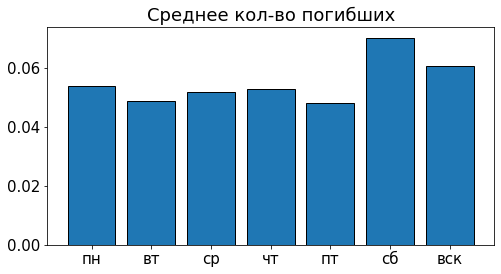

In [120]:
plt.figure(figsize=(8,4))
plt.title("Среднее кол-во погибших")
plt.bar(all_df.groupby(all_df.date.dt.weekday).mean()['POG'].index, 
        all_df.groupby(all_df.date.dt.weekday).mean()['POG'].values,
       tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
       edgecolor='black');

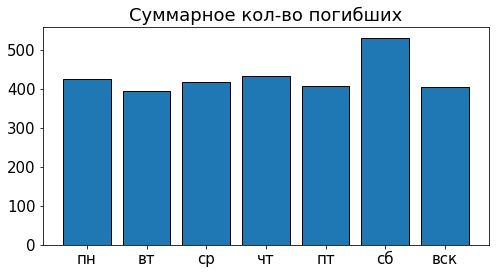

In [72]:
plt.figure(figsize=(8,4))
plt.title("Суммарное кол-во погибших")
plt.bar(all_df.groupby(all_df.date.dt.weekday).sum()['POG'].index, 
        all_df.groupby(all_df.date.dt.weekday).sum()['POG'].values,
       tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
       edgecolor='black');

In [6]:
# fig, axs = plt.subplots(3, 1, figsize=(10,13))
# axs[0].bar(all_df.groupby(all_df.date.dt.weekday).count()['RAN'].index, 
#         all_df.groupby(all_df.date.dt.weekday).count()['RAN'].values,
#        tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
#        edgecolor='black');
# axs[0].set_title("Количество ДТП по дням недели")

# axs[1].bar(all_df.groupby(all_df.date.dt.weekday).mean()['RAN'].index, 
#         all_df.groupby(all_df.date.dt.weekday).mean()['RAN'].values,
#        tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
#        edgecolor='black');
# axs[1].set_title("Среднее количество раненных");


# axs[2].bar(all_df.groupby(all_df.date.dt.weekday).mean()['POG'].index, 
#         all_df.groupby(all_df.date.dt.weekday).mean()['POG'].values,
#        tick_label=['пн', 'вт', 'ср', 'чт', 'пт' ,'сб', 'вск'],
#        edgecolor='black');

# axs[2].set_title("Среднее количество погибших")

# figsave('ran_pog_ratios_weekday.png')

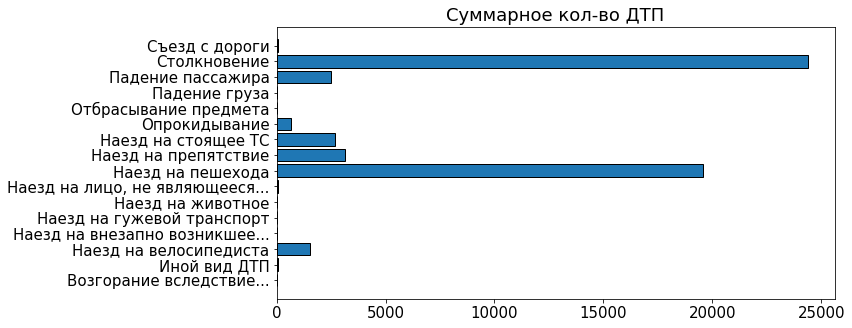

In [156]:
ind, val = df.groupby(df.DTP_V).count()['POG'].index, df.groupby(df.DTP_V).count()['POG'].values

#ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(10,5))
plt.title("Суммарное кол-во ДТП")
plt.barh([textwrap.shorten(x, 35, placeholder='...') for x in ind.to_list()], 
        val,
       edgecolor='black');
#plt.xticks(ind.to_list(), rotation=45);

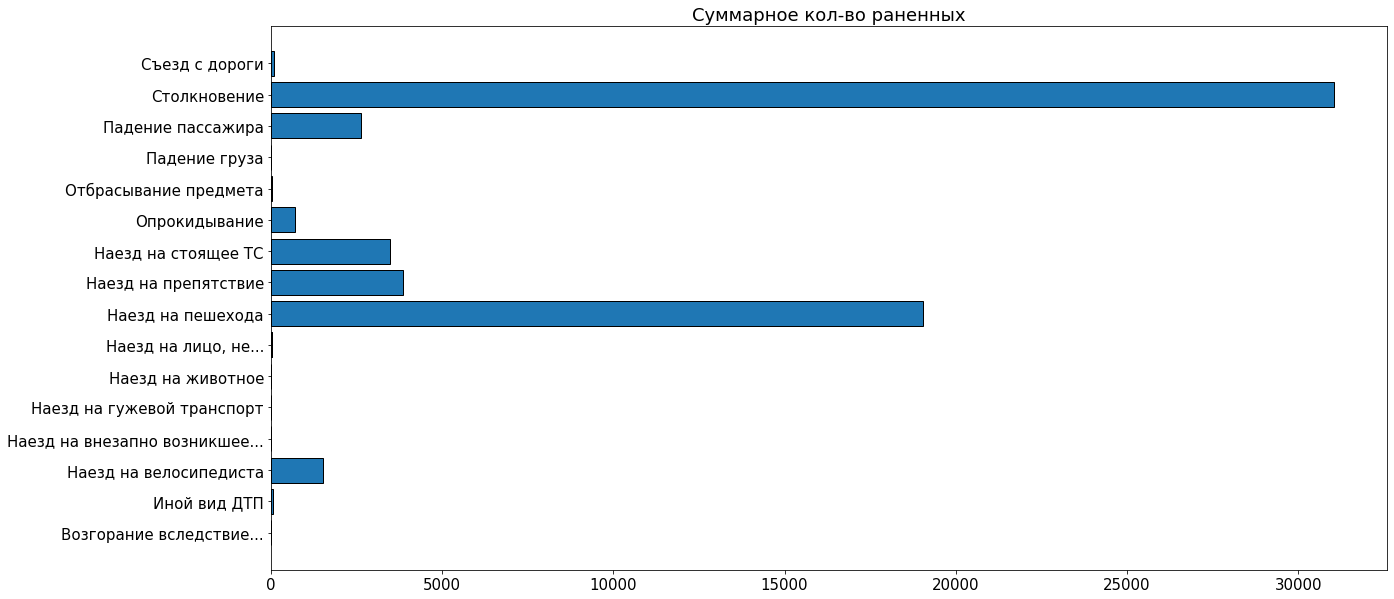

In [74]:
ind, val = df.groupby(df.DTP_V).sum()['RAN'].index, df.groupby(df.DTP_V).sum()['RAN'].values

#ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(20,10))
plt.title("Суммарное кол-во раненных")
plt.barh([textwrap.shorten(x, 30, placeholder='...') for x in ind.to_list()], 
        val,
       edgecolor='black');
#plt.xticks(ind.to_list(), rotation=45);

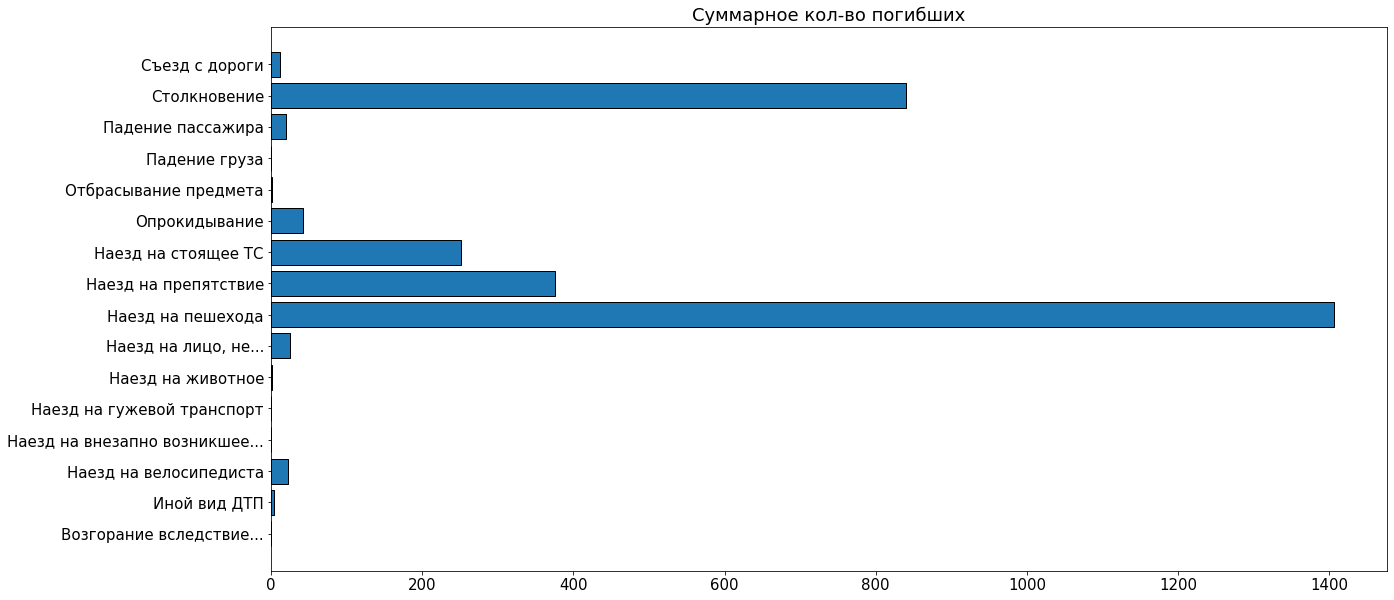

In [75]:
ind, val = df.groupby(df.DTP_V).sum()['POG'].index, df.groupby(df.DTP_V).sum()['POG'].values

#ind, val = ind[ind != 'Не установлено'], val[ind != 'Не установлено']

plt.figure(figsize=(20,10))
plt.title("Суммарное кол-во погибших")
plt.barh([textwrap.shorten(x, 30, placeholder='...') for x in ind.to_list()], 
        val,
       edgecolor='black');
#plt.xticks(ind.to_list(), rotation=45);

In [189]:
all_df.head()

,date,Time,District,DTP_V,POG,RAN,K_TS,ndu,k_ul,dor_k,dor_z,factor,s_pog,s_pch,osv,COORD_W,COORD_L,s_dtp,time,T
date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,04:30,Марьина роща,Столкновение,0,1,2,['Не установлены'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.795833,37.612778,500,04:30,-5.0
2015-01-01,2015-01-01,05:05,Крюково,Столкновение,0,1,2,"['Низкие сцепные качества покрытия', 'Недостат...",Улицы и дороги местного значения в жилой застр...,2.0,Не указано,"['Участок, контролируемый камерой автоматическ...",['Пасмурно'],Заснеженное,"В темное время суток, освещение включено",55.979444,37.187222,300,05:00,-4.0
2015-01-01,2015-01-01,18:00,Крюково,Наезд на пешехода,0,1,1,['Недостатки зимнего содержания'],Улицы и дороги местного значения в жилой застр...,2.0,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.977222,37.158056,750,18:00,0.0
2015-01-01,2015-01-01,01:39,Солнцево,Столкновение,0,1,2,['Недостатки зимнего содержания'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Заснеженное,"В темное время суток, освещение включено",55.649444,37.405833,210,01:30,-6.0
2015-01-01,2015-01-01,03:35,Рязанский,Столкновение,0,1,2,['Неудовлетворительное состояние разделительно...,Магистральные улицы районного значения,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Сухое,"В темное время суток, освещение включено",55.730833,37.338889,60,03:30,-5.0


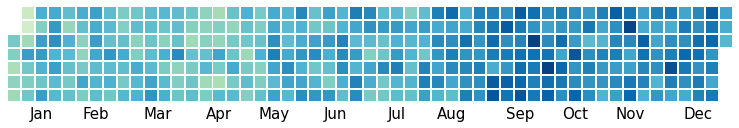

In [164]:
all_days = pd.date_range('1/1/2014', periods=366, freq='D')
events = pd.Series(all_df.groupby(all_df.date.dt.dayofyear).count()['date'].values, index=all_days)

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
#plt.title("Тепловая карта кол-ва ДТП за 5 лет")

calmap.yearplot(events, cmap='GnBu', ax=ax, dayticks=False);


#figsave('dtp_count_heatmap.png')

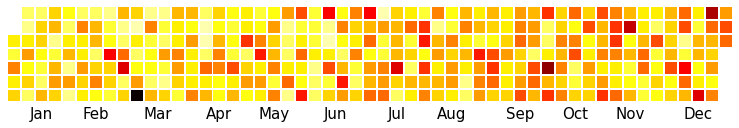

In [165]:
all_days = pd.date_range('1/1/2014', periods=366, freq='D')
events = pd.Series(all_df.groupby(all_df.date.dt.dayofyear).sum()['POG'].values, index=all_days)

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
#plt.title("Тепловая карта кол-ва погибших в ДТП за 5 лет")

calmap.yearplot(events, cmap='hot_r', ax=ax, dayticks=False);

#figsave('dtp_pog_heatmap.png')

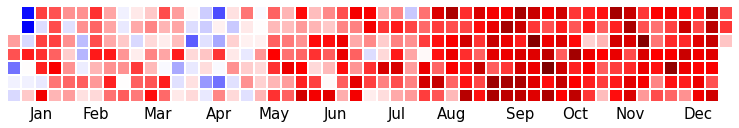

In [167]:
all_days = pd.date_range('1/1/2014', periods=366, freq='D')
events = pd.Series(all_df.groupby(all_df.date.dt.dayofyear).sum()['RAN'].values, index=all_days)

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
#plt.title("Тепловая карта кол-ва раненных в ДТП за 5 лет")

calmap.yearplot(events, cmap='seismic', ax=ax, dayticks=False);

#figsave('dtp_ran_heatmap.png')

In [249]:
all_df.head()

,date,Time,District,DTP_V,POG,RAN,K_TS,ndu,k_ul,dor_k,dor_z,factor,s_pog,s_pch,osv,COORD_W,COORD_L,s_dtp,time,T
date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,04:30,Марьина роща,Столкновение,0,1,2,['Не установлены'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.795833,37.612778,500,04:30,-5.0
2015-01-01,2015-01-01,05:05,Крюково,Столкновение,0,1,2,"['Низкие сцепные качества покрытия', 'Недостат...",Улицы и дороги местного значения в жилой застр...,2.0,Не указано,"['Участок, контролируемый камерой автоматическ...",['Пасмурно'],Заснеженное,"В темное время суток, освещение включено",55.979444,37.187222,300,05:00,-4.0
2015-01-01,2015-01-01,18:00,Крюково,Наезд на пешехода,0,1,1,['Недостатки зимнего содержания'],Улицы и дороги местного значения в жилой застр...,2.0,Не указано,['Сведения отсутствуют'],['Пасмурно'],Мокрое,"В темное время суток, освещение включено",55.977222,37.158056,750,18:00,0.0
2015-01-01,2015-01-01,01:39,Солнцево,Столкновение,0,1,2,['Недостатки зимнего содержания'],Улицы и дороги местного значения в жилой застр...,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Заснеженное,"В темное время суток, освещение включено",55.649444,37.405833,210,01:30,-6.0
2015-01-01,2015-01-01,03:35,Рязанский,Столкновение,0,1,2,['Неудовлетворительное состояние разделительно...,Магистральные улицы районного значения,NaN,Не указано,['Сведения отсутствуют'],['Пасмурно'],Сухое,"В темное время суток, освещение включено",55.730833,37.338889,60,03:30,-5.0


In [248]:
count_dtp = all_df.groupby(all_df['date']).count()['Time']

In [257]:
temperature = all_df.groupby(all_df['date']).first()['T']

In [304]:
train = pd.DataFrame([count_dtp, temperature], index=['dtp_count', 'temp']).T

In [305]:
train.head()

,dtp_count,temp
date,,
2015-01-01,24.0,-5.0
2015-01-02,24.0,1.0
2015-01-03,17.0,1.0
2015-01-04,17.0,-2.0
2015-01-05,17.0,-16.0


In [306]:
weekday_map = ['pn', 'vt', 'sr', 'cht', 'pt' ,'sb', 'vsk']

In [307]:
train.index.weekday.map(lambda x: weekday_map[x])

Index(['cht', 'pt', 'sb', 'vsk', 'pn', 'vt', 'sr', 'cht', 'pt', 'sb',
       ...
       'vt', 'sr', 'cht', 'pt', 'sb', 'vsk', 'pn', 'vt', 'sr', 'cht'],
      dtype='object', name='date', length=2192)

In [308]:
train['weekday'] = train.index.weekday

In [309]:
train['month'] = train.index.month.map(str)

In [310]:
train['year'] = train.index.year.map(str)

In [311]:
train.head()

,dtp_count,temp,weekday,month,year
date,,,,,
2015-01-01,24.0,-5.0,3,1,2015
2015-01-02,24.0,1.0,4,1,2015
2015-01-03,17.0,1.0,5,1,2015
2015-01-04,17.0,-2.0,6,1,2015
2015-01-05,17.0,-16.0,0,1,2015


In [312]:
train.to_csv('../model/train.csv')